In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
import scipy.stats as stats
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

# Replace the issue of booking template, if strip search occurs, formal booking will take place. 
data.loc[data['StripSearch'] == 1, ['Booked']] = 1

#EDA
data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [4]:
data_clean = data.drop(['Arrest_Year','Arrest_Month','Youth_at_arrest__under_18_years','Occurrence_Category','Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative','EventID','ArrestID','PersonID','ArrestLocDiv','ItemsFound','ObjectId','SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons','SearchReason_PossessEvidence'], axis=1)

In [5]:
data_clean['Age_group__at_arrest_'] = data_clean['Age_group__at_arrest_'].replace('Aged 65 years and older','Aged 65 and older')
data_clean['Age_group__at_arrest_'] = data_clean['Age_group__at_arrest_'].replace('Aged 17 years and under','Aged 17 and younger')
data_clean['Age_group__at_arrest_'] = data_clean['Age_group__at_arrest_'].replace('Aged 17 years and younger','Aged 17 and younger')

In [6]:
data_clean = data_clean.dropna(subset=['Age_group__at_arrest_'])
data_clean = data_clean.dropna(subset=['StripSearch'])
data_clean = data_clean.dropna(subset=['Booked'])
data_clean = data_clean.dropna(subset=['Perceived_Race'])
data_clean = data_clean.drop(data_clean[data_clean['Sex']=='U'].index)
data2 = data_clean
data_clean

,Perceived_Race,Sex,Age_group__at_arrest_,StripSearch,Booked
0,White,M,Aged 35 to 44 years,0,1
1,White,M,Aged 35 to 44 years,0,1
2,Unknown or Legacy,M,Aged 35 to 44 years,0,1
3,Black,M,Aged 25 to 34 years,0,0
4,South Asian,M,Aged 25 to 34 years,0,1
...,...,...,...,...,...
65271,Indigenous,F,Aged 25 to 34 years,0,0
65272,South Asian,M,Aged 35 to 44 years,0,1
65273,White,F,Aged 45 to 54 years,0,0
65274,Unknown or Legacy,M,Aged 17 and younger,0,0


In [7]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65239 entries, 0 to 65275
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Perceived_Race         65239 non-null  object
 1   Sex                    65239 non-null  object
 2   Age_group__at_arrest_  65239 non-null  object
 3   StripSearch            65239 non-null  int64 
 4   Booked                 65239 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.0+ MB


In [8]:
num = []
for col in data_clean:
    if data_clean[col].dtype != 'object':
        num.append(col)
print('Numerical Variables: ', num)

Numerical Variables:  ['StripSearch', 'Booked']


In [9]:
cat = []
for col in data_clean:
    if data_clean[col].dtype == 'object':
        cat.append(col)
print('Categorical Variables:', cat)

Categorical Variables: ['Perceived_Race', 'Sex', 'Age_group__at_arrest_']


In [10]:
print(data_clean.Perceived_Race.value_counts())
print(data_clean.Sex.value_counts())
print(data_clean.Age_group__at_arrest_.value_counts())

White                   27708
Black                   17518
Unknown or Legacy        5052
East/Southeast Asian     4412
South Asian              3613
Middle-Eastern           3237
Indigenous               1932
Latino                   1767
Name: Perceived_Race, dtype: int64
M    52631
F    12608
Name: Sex, dtype: int64
Aged 25 to 34 years    20944
Aged 35 to 44 years    16240
Aged 18 to 24 years    10038
Aged 45 to 54 years     9065
Aged 55 to 64 years     4588
Aged 17 and younger     3042
Aged 65 and older       1322
Name: Age_group__at_arrest_, dtype: int64


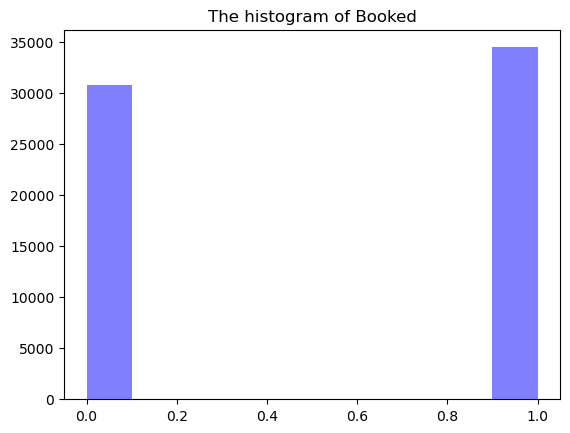

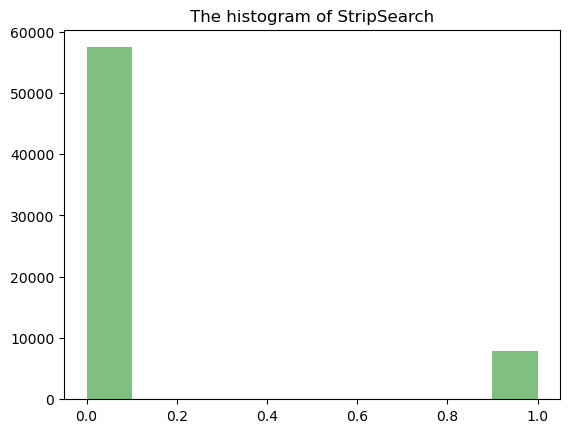

In [11]:
#Histogram of Booked and StripSearch

plt.hist(data_clean['Booked'], alpha = 0.5, color = 'blue')
plt.title('The histogram of Booked')
plt.show()
plt.hist(data_clean['StripSearch'], alpha = 0.5, color = 'green')
plt.title('The histogram of StripSearch')
plt.show()

In [12]:
#Countplot of Booked vs. Perceived_Race
bookedgroup = data_clean.groupby(['Perceived_Race', 'Booked'])
print(bookedgroup.size())

Perceived_Race        Booked
Black                 0          7685
                      1          9833
East/Southeast Asian  0          2302
                      1          2110
Indigenous            0           833
                      1          1099
Latino                0           793
                      1           974
Middle-Eastern        0          1588
                      1          1649
South Asian           0          1824
                      1          1789
Unknown or Legacy     0          2563
                      1          2489
White                 0         13177
                      1         14531
dtype: int64


Text(0.5, 1.0, 'Booked vs. Perceived_Race')

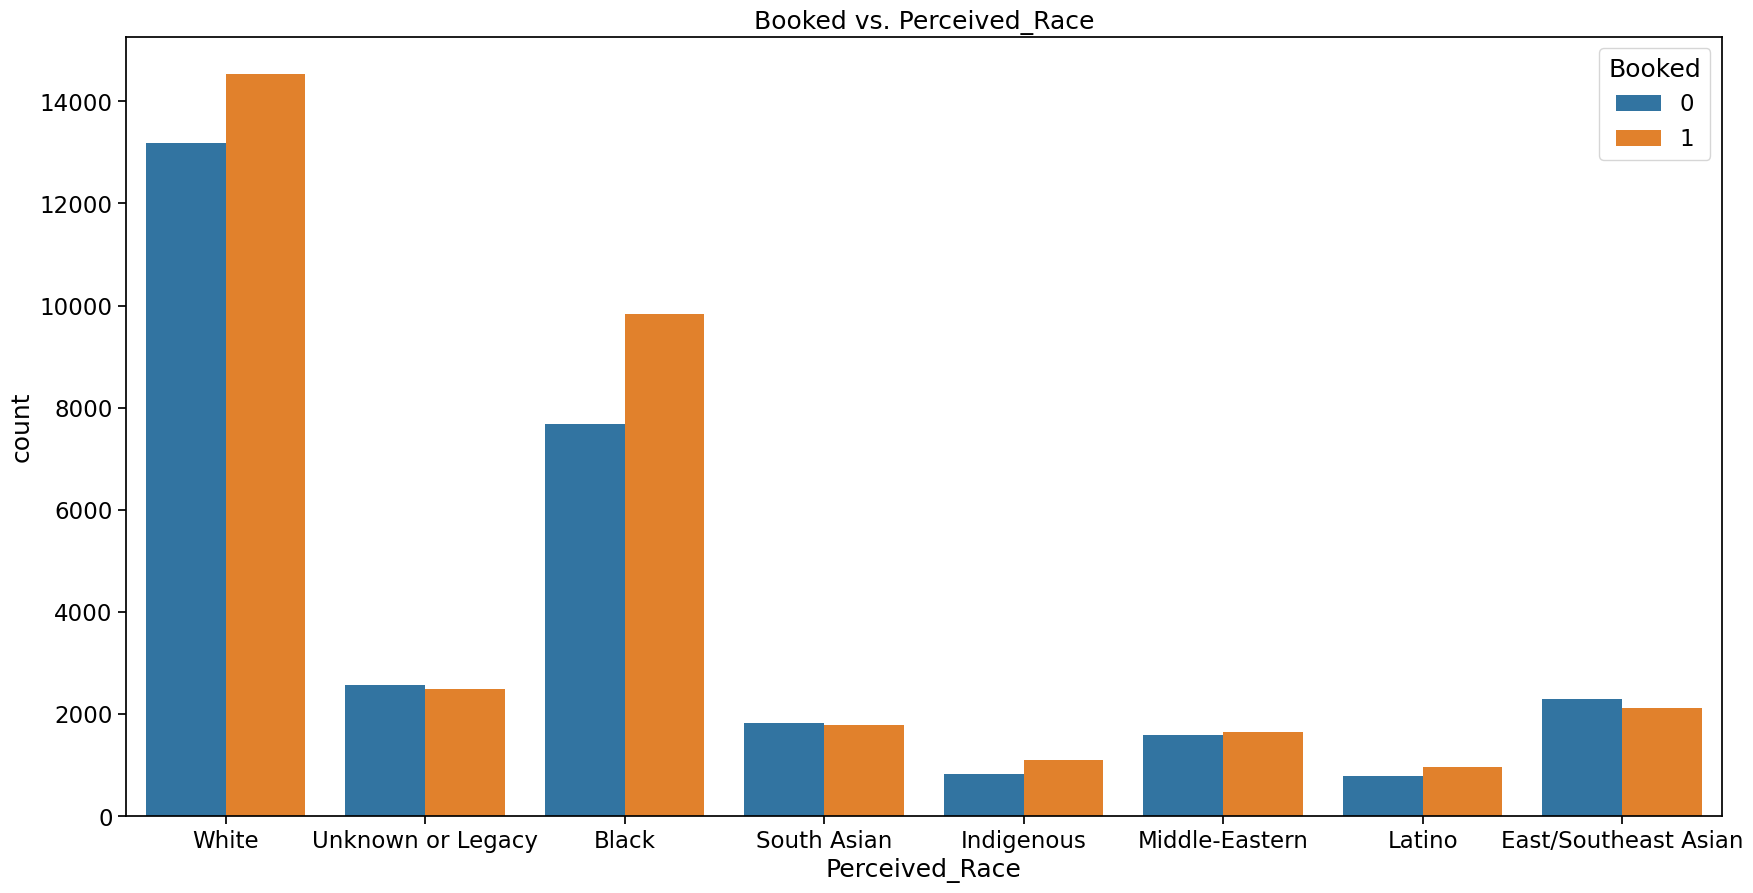

In [13]:
plt.figure(figsize = (18, 9))
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Perceived_Race', hue = 'Booked')
plt.tight_layout()
plt.title('Booked vs. Perceived_Race')

Sex  Booked
F    0          7027
     1          5581
M    0         23738
     1         28893
dtype: int64


Text(0.5, 1.0, 'Booked vs. Sex')

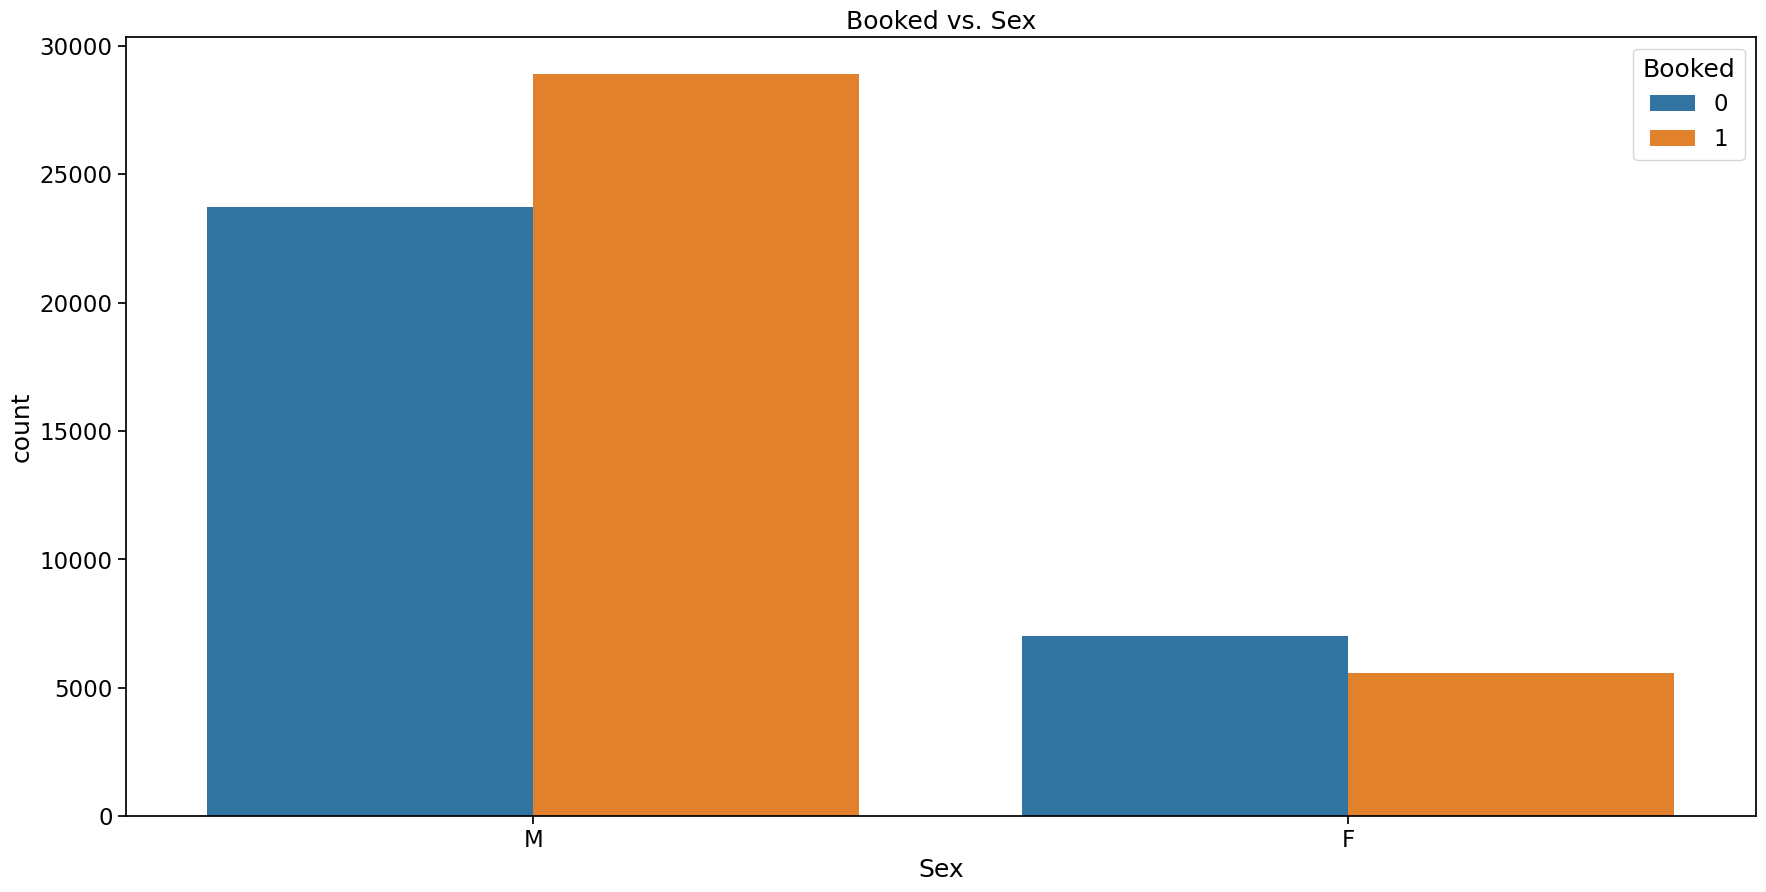

In [14]:
#Countplot of Booked vs. Sex
bookedgroup = data_clean.groupby(['Sex', 'Booked'])
print(bookedgroup.size())
plt.figure(figsize = (18, 9))
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Sex', hue = 'Booked')
plt.tight_layout()
plt.title('Booked vs. Sex')

Age_group__at_arrest_  Booked
Aged 17 and younger    0          1790
                       1          1252
Aged 18 to 24 years    0          4711
                       1          5327
Aged 25 to 34 years    0          9259
                       1         11685
Aged 35 to 44 years    0          7362
                       1          8878
Aged 45 to 54 years    0          4364
                       1          4701
Aged 55 to 64 years    0          2453
                       1          2135
Aged 65 and older      0           826
                       1           496
dtype: int64


Text(0.5, 1.0, 'Booked vs. Age_group__at_arrest_')

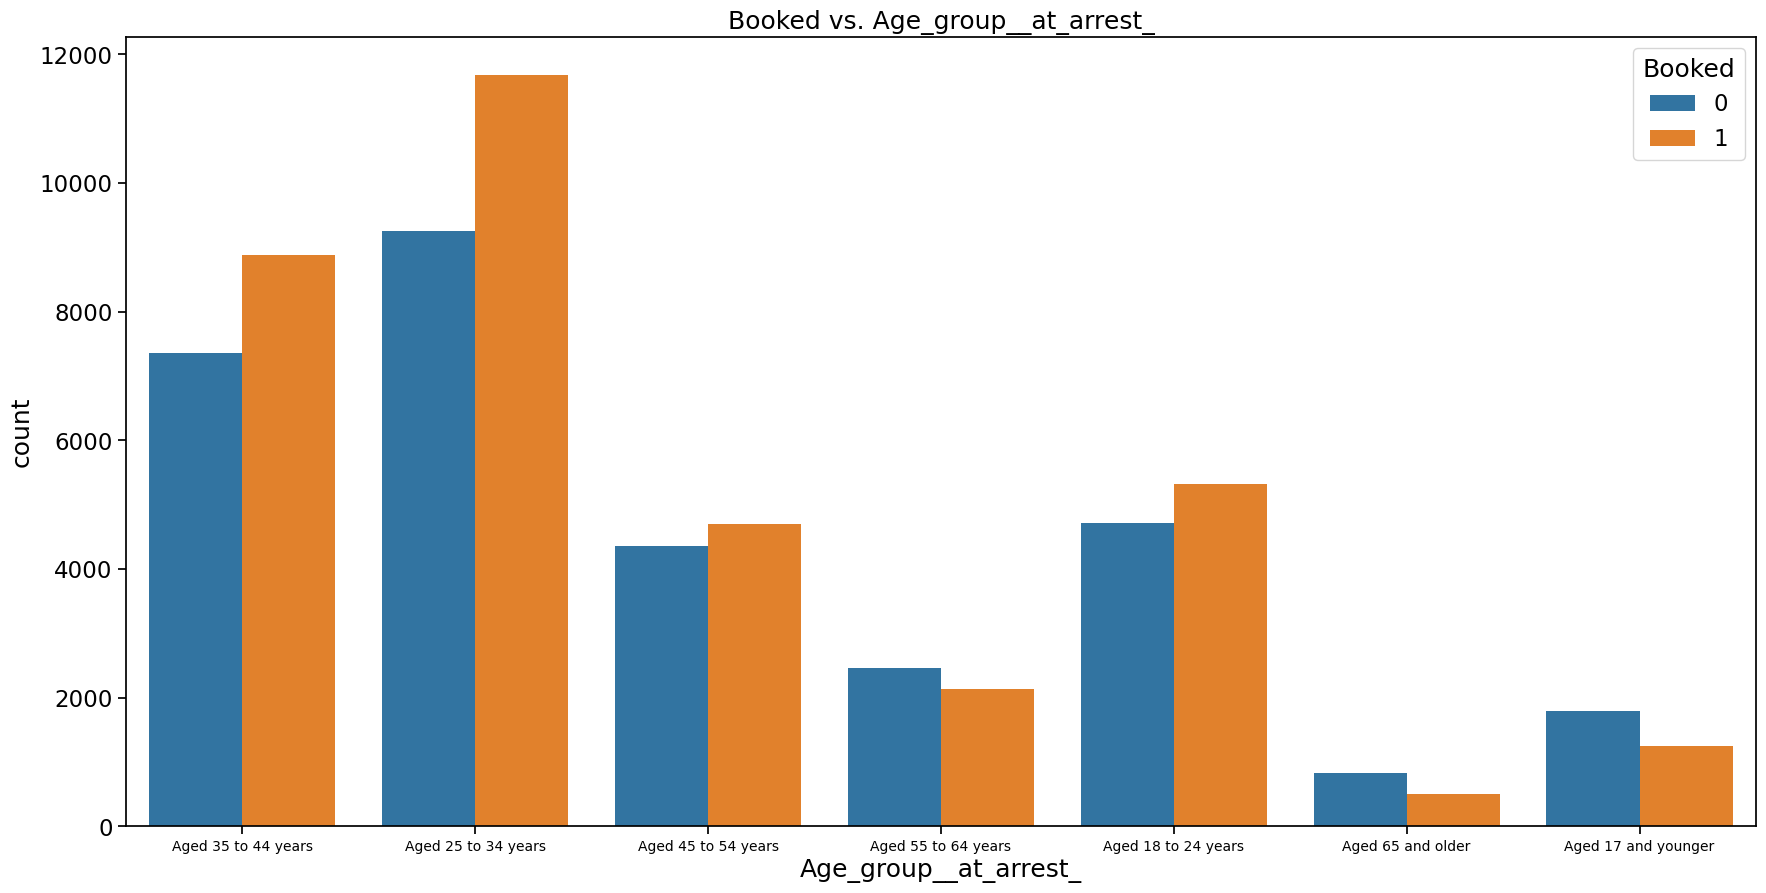

In [15]:
#Countplot of Booked vs. Age_group__at_arrest_
bookedgroup = data_clean.groupby(['Age_group__at_arrest_', 'Booked'])
print(bookedgroup.size())
plt.figure(figsize = (18, 9))
plt.xticks(fontsize = 10)
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Age_group__at_arrest_', hue = 'Booked')
plt.tight_layout()
plt.title('Booked vs. Age_group__at_arrest_')

Perceived_Race        StripSearch
Black                 0              15084
                      1               2434
East/Southeast Asian  0               4071
                      1                341
Indigenous            0               1626
                      1                306
Latino                0               1635
                      1                132
Middle-Eastern        0               3009
                      1                228
South Asian           0               3356
                      1                257
Unknown or Legacy     0               4516
                      1                536
White                 0              24142
                      1               3566
dtype: int64


Text(0.5, 1.0, 'StripSearch vs. Perceived_Race')

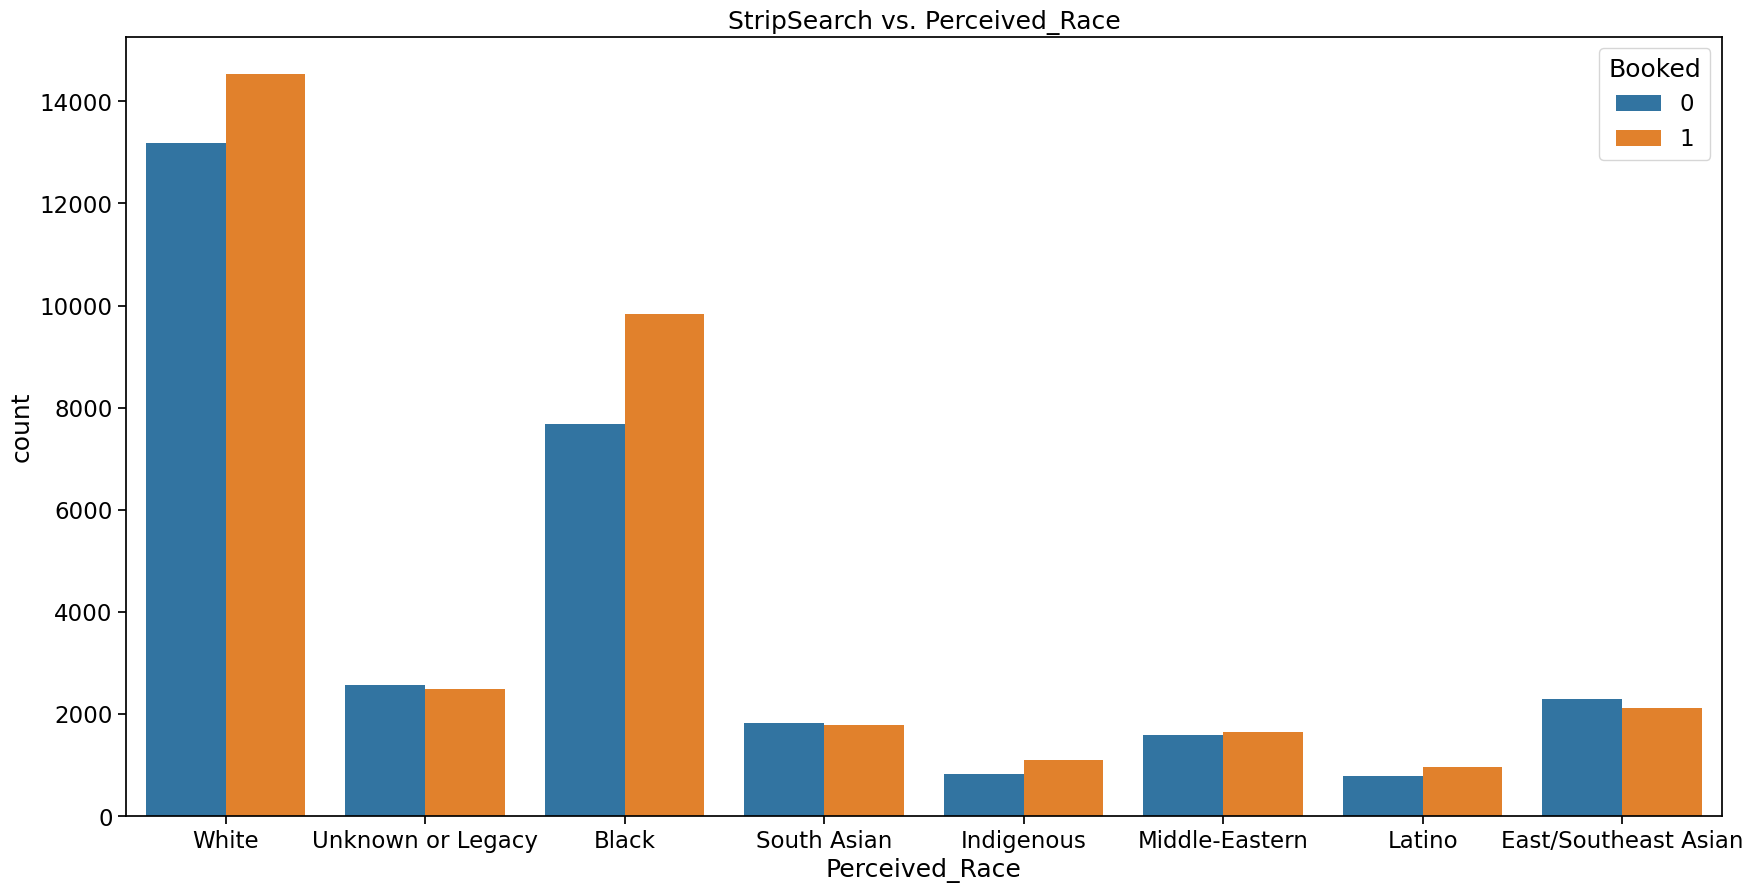

In [16]:
#Countplot of StripSearch vs. Perceived_Race
searchgroup = data_clean.groupby(['Perceived_Race', 'StripSearch'])
print(searchgroup.size())
plt.figure(figsize = (18, 9))
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Perceived_Race', hue = 'Booked')
plt.tight_layout()
plt.title('StripSearch vs. Perceived_Race')

Sex  StripSearch
F    0              11325
     1               1283
M    0              46114
     1               6517
dtype: int64


Text(0.5, 1.0, 'StripSearch vs. Sex')

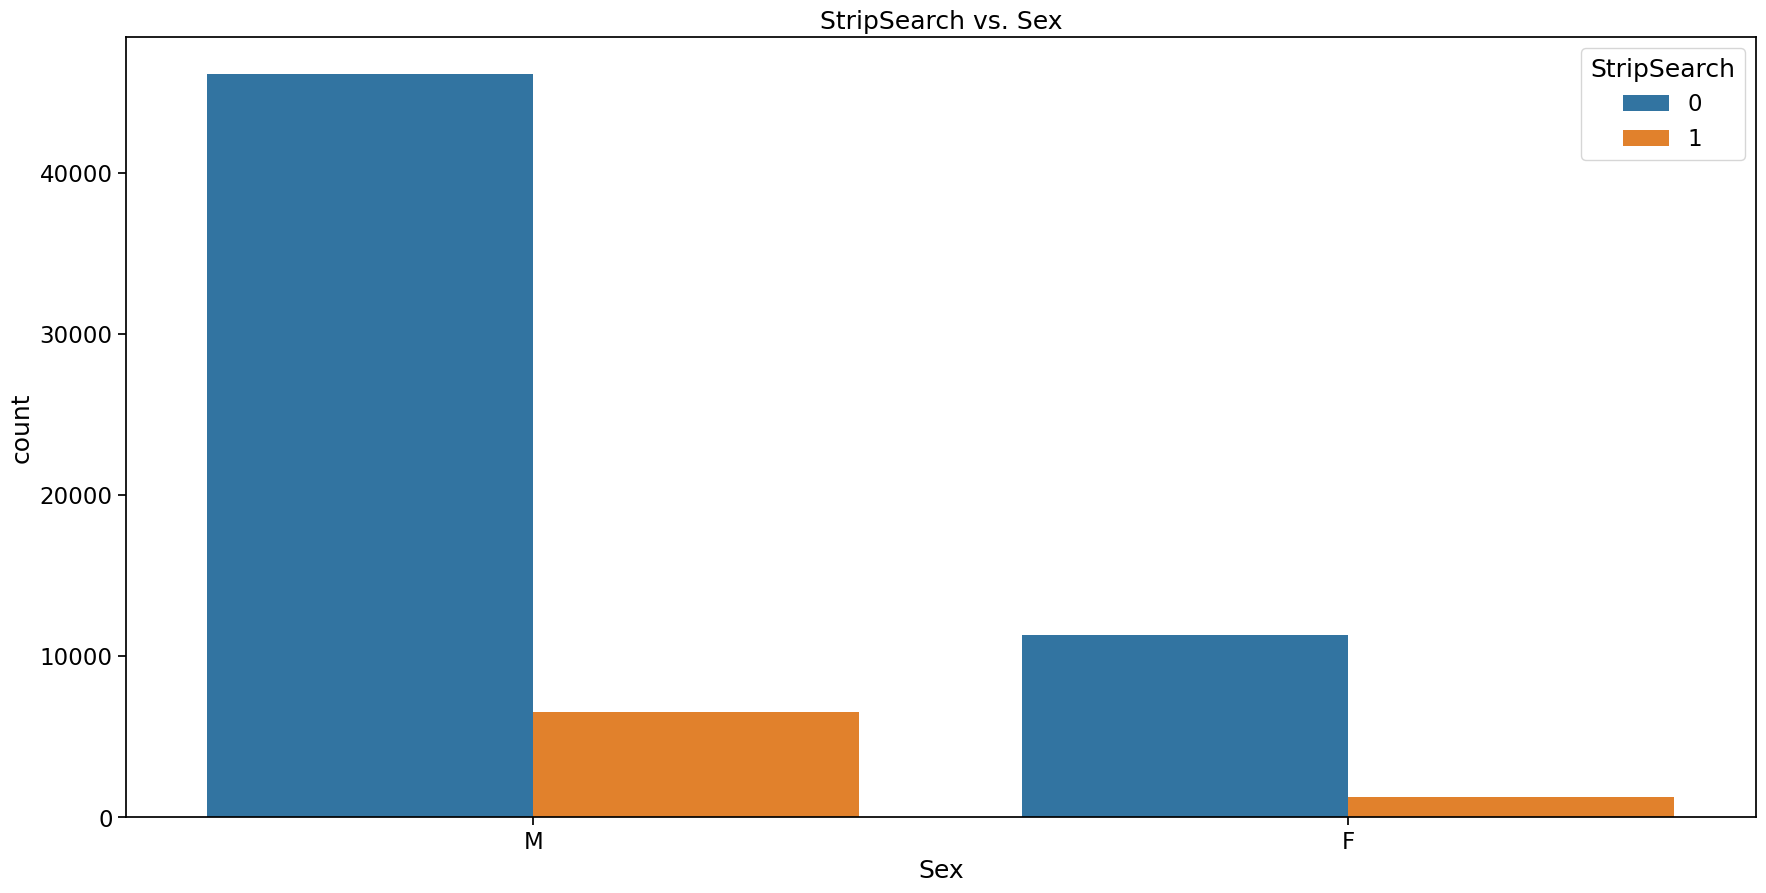

In [17]:
#Countplot of StripSearch vs. Sex
searchgroup = data_clean.groupby(['Sex', 'StripSearch'])
print(searchgroup.size())
plt.figure(figsize = (18, 9))
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Sex', hue = 'StripSearch')
plt.tight_layout()
plt.title('StripSearch vs. Sex')

Age_group__at_arrest_  StripSearch
Aged 17 and younger    0               2762
                       1                280
Aged 18 to 24 years    0               8689
                       1               1349
Aged 25 to 34 years    0              18173
                       1               2771
Aged 35 to 44 years    0              14143
                       1               2097
Aged 45 to 54 years    0               8160
                       1                905
Aged 55 to 64 years    0               4226
                       1                362
Aged 65 and older      0               1286
                       1                 36
dtype: int64


Text(0.5, 1.0, 'StripSearch vs. Age_group__at_arrest_')

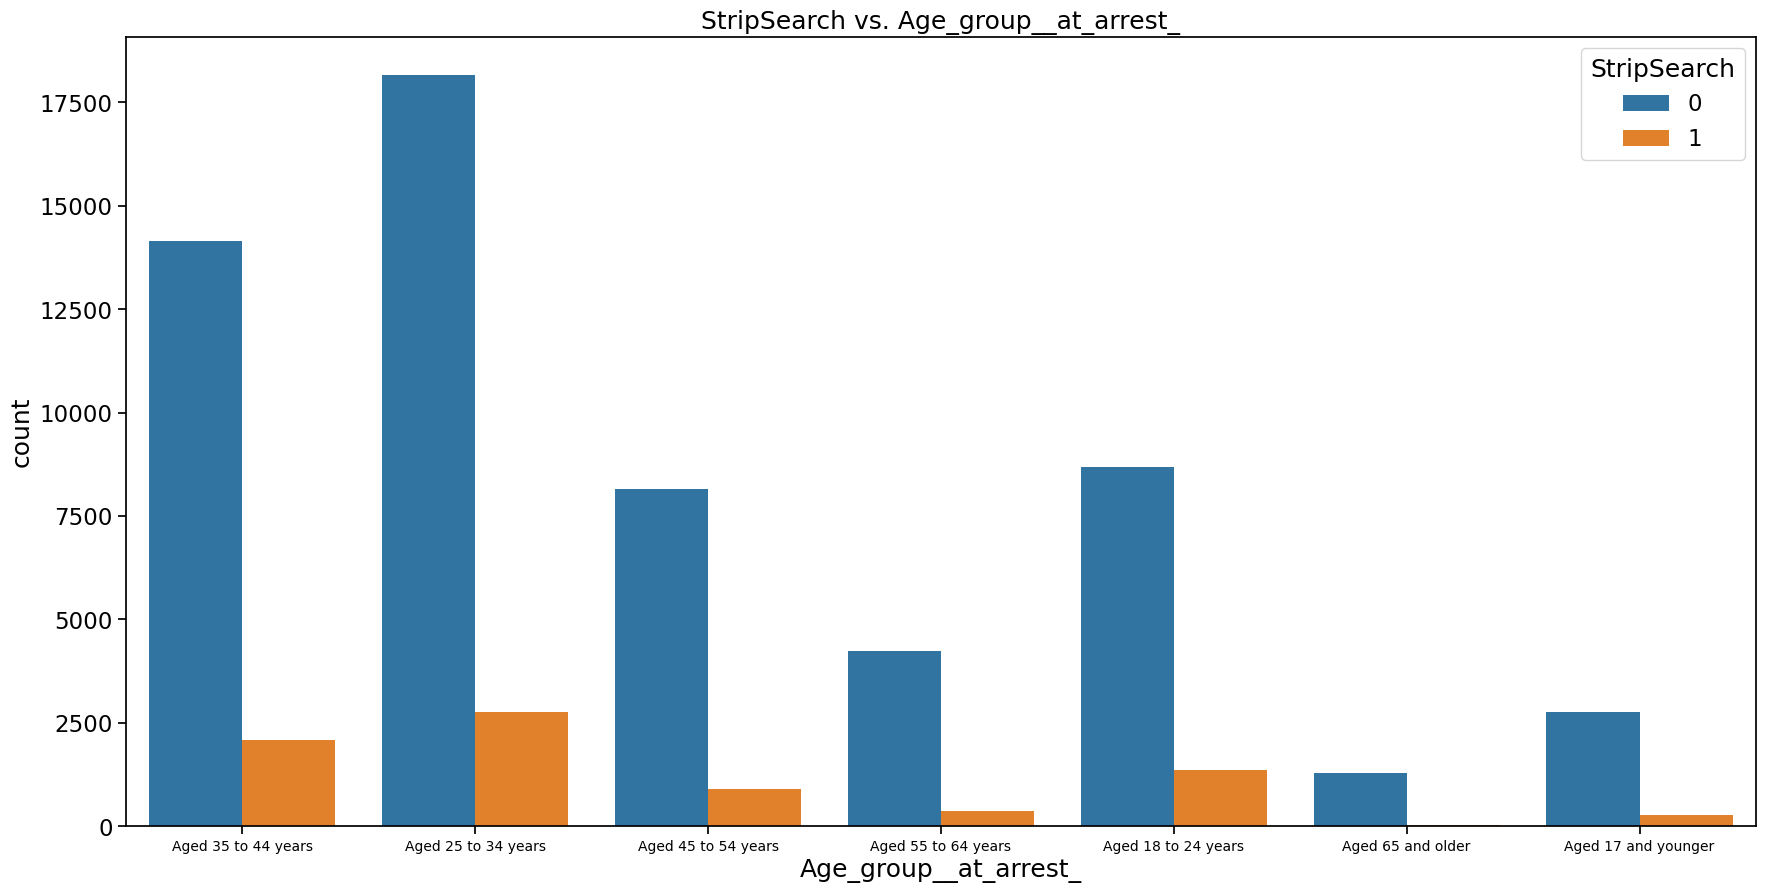

In [18]:
#Countplot of StripSearch vs. Age_group__at_arrest_
searchgroup = data_clean.groupby(['Age_group__at_arrest_', 'StripSearch'])
print(searchgroup.size())
plt.figure(figsize = (18, 9))
plt.xticks(fontsize = 10)
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Age_group__at_arrest_', hue = 'StripSearch')
plt.tight_layout()
plt.title('StripSearch vs. Age_group__at_arrest_')

In [19]:
#Convert all variables from object type into int
num_data = data_clean.copy(deep = True)

num_data.loc[num_data.Perceived_Race == 'White', 'Perceived_Race'] = 1
num_data.loc[num_data.Perceived_Race == 'Black', 'Perceived_Race'] = 2
num_data.loc[num_data.Perceived_Race == 'Unknown or Legacy', 'Perceived_Race'] = 3
num_data.loc[num_data.Perceived_Race == 'East/Southeast Asian', 'Perceived_Race'] = 4
num_data.loc[num_data.Perceived_Race == 'South Asian', 'Perceived_Race'] = 5
num_data.loc[num_data.Perceived_Race == 'Middle-Eastern', 'Perceived_Race'] = 6
num_data.loc[num_data.Perceived_Race == 'Indigenous', 'Perceived_Race'] = 7
num_data.loc[num_data.Perceived_Race == 'Latino', 'Perceived_Race'] = 8

In [20]:
num_data.loc[num_data.Sex == 'M', 'Sex'] = 1
num_data.loc[num_data.Sex == 'F', 'Sex'] = 2

In [21]:
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 17 and younger', 'Age_group__at_arrest_'] = 1
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 18 to 24 years', 'Age_group__at_arrest_'] = 2
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 25 to 34 years', 'Age_group__at_arrest_'] = 3
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 35 to 44 years', 'Age_group__at_arrest_'] = 4
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 45 to 54 years', 'Age_group__at_arrest_'] = 5
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 55 to 64 years', 'Age_group__at_arrest_'] = 6
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 65 and older', 'Age_group__at_arrest_'] = 7

In [22]:
num_data = num_data.astype('int')
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65239 entries, 0 to 65275
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Perceived_Race         65239 non-null  int64
 1   Sex                    65239 non-null  int64
 2   Age_group__at_arrest_  65239 non-null  int64
 3   StripSearch            65239 non-null  int64
 4   Booked                 65239 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


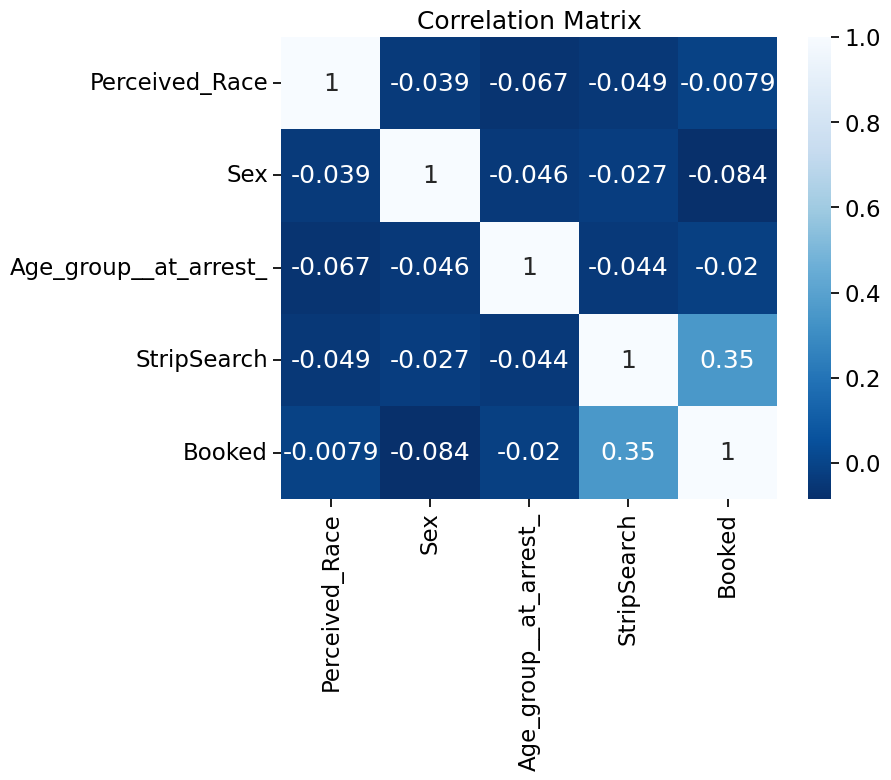

In [23]:
#Correlation Matrix
plt.figure(figsize = (8, 6))
corr_matrix = num_data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues_r')
plt.title('Correlation Matrix')
plt.show()

In [24]:
data_clean_grouped = num_data.groupby(['Sex','Perceived_Race','Age_group__at_arrest_']).mean().reset_index()
data_clean_grouped

,Sex,Perceived_Race,Age_group__at_arrest_,StripSearch,Booked
0,1,1,1,0.067350,0.352855
1,1,1,2,0.133751,0.540752
2,1,1,3,0.150768,0.569142
3,1,1,4,0.145703,0.568983
4,1,1,5,0.113506,0.542597
...,...,...,...,...,...
107,2,8,3,0.021053,0.505263
108,2,8,4,0.015625,0.421875
109,2,8,5,0.047619,0.380952
110,2,8,6,0.000000,0.000000


In [25]:
data2_grouped = data2.groupby(['Sex','Perceived_Race','Age_group__at_arrest_']).mean().reset_index()
pd.set_option('display.max_rows', 200)
data2_grouped

,Sex,Perceived_Race,Age_group__at_arrest_,StripSearch,Booked
0,F,Black,Aged 17 and younger,0.037975,0.367089
1,F,Black,Aged 18 to 24 years,0.118911,0.462751
2,F,Black,Aged 25 to 34 years,0.080416,0.475875
3,F,Black,Aged 35 to 44 years,0.072917,0.463542
4,F,Black,Aged 45 to 54 years,0.116541,0.447368
5,F,Black,Aged 55 to 64 years,0.024096,0.301205
6,F,Black,Aged 65 and older,0.000000,0.384615
7,F,East/Southeast Asian,Aged 17 and younger,0.024390,0.268293
8,F,East/Southeast Asian,Aged 18 to 24 years,0.037594,0.278195
9,F,East/Southeast Asian,Aged 25 to 34 years,0.026316,0.378947


In [26]:
data2_grouped['Perceived_Race'].unique()

array(['Black', 'East/Southeast Asian', 'Indigenous', 'Latino',
       'Middle-Eastern', 'South Asian', 'Unknown or Legacy', 'White'],
      dtype=object)

In [27]:
data2_grouped['Age_group__at_arrest_'].unique()

array(['Aged 17 and younger', 'Aged 18 to 24 years',
       'Aged 25 to 34 years', 'Aged 35 to 44 years',
       'Aged 45 to 54 years', 'Aged 55 to 64 years', 'Aged 65 and older'],
      dtype=object)

In [28]:
#Check the assumption of normality
for i in range(1, 3):
    Booked = data_clean_grouped.loc[data_clean_grouped.Sex == i]['Booked']
    Wtest, Pval = stats.shapiro(Booked)
    print('Booked of sex', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')
    
    StripSearch = data_clean_grouped.loc[data_clean_grouped.Sex == i]['StripSearch']
    Wtest, Pval = stats.shapiro(StripSearch)
    print('StripSearch of sex', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')

Booked of sex 1 
W test statistic: 0.9266993999481201 
P-value: 0.002189226681366563 

StripSearch of sex 1 
W test statistic: 0.9268404245376587 
P-value: 0.0022178515791893005 

Booked of sex 2 
W test statistic: 0.9364687204360962 
P-value: 0.005503933411091566 

StripSearch of sex 2 
W test statistic: 0.9362145662307739 
P-value: 0.0053704166784882545 



In [29]:
for i in range(1, 9):
    Booked = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['Booked']
    Wtest, Pval = stats.shapiro(Booked)
    print('Booked of race', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')
    
    StripSearch = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['StripSearch']
    Wtest, Pval = stats.shapiro(StripSearch)
    print('StripSearch of race', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')

Booked of race 1 
W test statistic: 0.9290986061096191 
P-value: 0.2963760495185852 

StripSearch of race 1 
W test statistic: 0.9456801414489746 
P-value: 0.49585723876953125 

Booked of race 2 
W test statistic: 0.9510549902915955 
P-value: 0.5772020220756531 

StripSearch of race 2 
W test statistic: 0.9630455374717712 
P-value: 0.7727618217468262 

Booked of race 3 
W test statistic: 0.866902232170105 
P-value: 0.037970561534166336 

StripSearch of race 3 
W test statistic: 0.885810375213623 
P-value: 0.07036421447992325 

Booked of race 4 
W test statistic: 0.9282863140106201 
P-value: 0.2886688709259033 

StripSearch of race 4 
W test statistic: 0.9695091843605042 
P-value: 0.8700189590454102 

Booked of race 5 
W test statistic: 0.926249086856842 
P-value: 0.27012816071510315 

StripSearch of race 5 
W test statistic: 0.9586115479469299 
P-value: 0.7001687288284302 

Booked of race 6 
W test statistic: 0.9014165997505188 
P-value: 0.11825280636548996 

StripSearch of race 6 
W t

In [30]:
for i in range(1, 8):
    Booked = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['Booked']
    Wtest, Pval = stats.shapiro(Booked)
    print('Booked of age group', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')
    
    StripSearch = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['StripSearch']
    Wtest, Pval = stats.shapiro(StripSearch)
    print('StripSearch of age group', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')

Booked of age group 1 
W test statistic: 0.9594866037368774 
P-value: 0.6524813175201416 

StripSearch of age group 1 
W test statistic: 0.7980818748474121 
P-value: 0.00256865075789392 

Booked of age group 2 
W test statistic: 0.9380999803543091 
P-value: 0.32638856768608093 

StripSearch of age group 2 
W test statistic: 0.9345966577529907 
P-value: 0.2879940867424011 

Booked of age group 3 
W test statistic: 0.9079998135566711 
P-value: 0.10804624110460281 

StripSearch of age group 3 
W test statistic: 0.9498445987701416 
P-value: 0.4872291386127472 

Booked of age group 4 
W test statistic: 0.9112675786018372 
P-value: 0.12197845429182053 

StripSearch of age group 4 
W test statistic: 0.9781230092048645 
P-value: 0.946945309638977 

Booked of age group 5 
W test statistic: 0.9226506948471069 
P-value: 0.1860736459493637 

StripSearch of age group 5 
W test statistic: 0.952843427658081 
P-value: 0.5360305905342102 

Booked of age group 6 
W test statistic: 0.9273226857185364 
P-

In [31]:
#Welch's T-test
print('Welch t-test of booked(race):')
Booked_1 = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == 1]['Booked']
Booked_2 = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == 2]['Booked']
Booked_4 = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == 4]['Booked']
Booked_5 = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == 5]['Booked']
Booked_6 = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == 6]['Booked']

W_stat, p_val = stats.ttest_ind(Booked_1, Booked_2, equal_var = False)
print('Welch t-test statistic:', W_stat)
print('P-value:', p_val)

Welch t-test of booked(race):
Welch t-test statistic: -0.9225875633582311
P-value: 0.36476236213079505


In [32]:
print('Welch t-test of Booked(race):')
for i in [1, 2, 4, 5, 6]:
    j = i + 1
    if j in [1, 2, 4, 5, 6]:
        Booked[i] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['Booked']
        Booked[j] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == j]['Booked']
        W_stat, p_val = stats.ttest_ind(Booked[i], Booked[j], equal_var = False)
        print('Welch t-test statistic of:', i, 'and', j, 'is', W_stat)
        print('P-value:', p_val)

W_stat, p_val = stats.ttest_ind(Booked[2], Booked[4], equal_var = False)
print('Welch t-test statistic of:', 2, 'and', 4, 'is', W_stat)
print('P-value:', p_val)

Welch t-test of Booked(race):
Welch t-test statistic of: 1 and 2 is -0.9225875633582311
P-value: 0.36476236213079505
Welch t-test statistic of: 4 and 5 is -0.18512992031352524
P-value: 0.8545853879868112
Welch t-test statistic of: 5 and 6 is 0.09633251991572506
P-value: 0.9240267557315233
Welch t-test statistic of: 2 and 4 is 2.608916848956554
P-value: 0.01537551506985069


/tmp/ipykernel_30/2407141936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[i] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['Booked']
/tmp/ipykernel_30/2407141936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[j] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == j]['Booked']
/tmp/ipykernel_30/2407141936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[j] = data_clean_gro

In [33]:
print('Welch t-test of Booked(age):')
for i in range(1, 7):
    j = i + 1
    Booked[i] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['Booked']
    Booked[j] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == j]['Booked']
    W_stat, p_val = stats.ttest_ind(Booked[i], Booked[j], equal_var = False)
    print('Welch t-test statistic of:', i, 'and', j, 'is', W_stat)
    print('P-value:', p_val)

Welch t-test of Booked(age):
Welch t-test statistic of: 1 and 2 is -3.323107146675106
P-value: 0.003021867286088903
Welch t-test statistic of: 2 and 3 is -0.5670529716463293
P-value: 0.5749308887538325
Welch t-test statistic of: 3 and 4 is 0.8585813704875908
P-value: 0.39767054878229946
Welch t-test statistic of: 4 and 5 is 0.7448763752591496
P-value: 0.46214620180111665
Welch t-test statistic of: 5 and 6 is 1.460988915184134
P-value: 0.15720283305047317
Welch t-test statistic of: 6 and 7 is 1.0861491364473763
P-value: 0.2860779776540926


/tmp/ipykernel_30/4235409267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[i] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['Booked']
/tmp/ipykernel_30/4235409267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[j] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == j]['Booked']
/tmp/ipykernel_30/4235409267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[j] = 

In [34]:
print('Welch t-test of StripSearch(race):')
for i in range(1, 8):
    j = i + 1
    StripSearch[i] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['StripSearch']
    StripSearch[j] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == j]['StripSearch']
    W_stat, p_val = stats.ttest_ind(StripSearch[i], StripSearch[j], equal_var = False)
    print('Welch t-test statistic of:', i, 'and', j, 'is', W_stat)
    print('P-value:', p_val)

Welch t-test of StripSearch(race):
Welch t-test statistic of: 1 and 2 is -0.05276858279135227
P-value: 0.9583217695033168
Welch t-test statistic of: 2 and 3 is 0.9679460027553068
P-value: 0.342145195871865
Welch t-test statistic of: 3 and 4 is 1.8909260582254646
P-value: 0.07097395577662255
Welch t-test statistic of: 4 and 5 is -0.3261318020810371
P-value: 0.7469352737059293
Welch t-test statistic of: 5 and 6 is 0.5828187549592746
P-value: 0.565040441542044
Welch t-test statistic of: 6 and 7 is -3.277080698196396
P-value: 0.004566101089849111
Welch t-test statistic of: 7 and 8 is 2.234865570782277
P-value: 0.03605380134437146


/tmp/ipykernel_30/2092536692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StripSearch[i] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['StripSearch']
/tmp/ipykernel_30/2092536692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StripSearch[j] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == j]['StripSearch']
/tmp/ipykernel_30/2092536692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StripS

In [35]:
print('Welch t-test of StripSearch(age):')
for i in range(2, 6):
    j = i + 1
    StripSearch[i] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['StripSearch']
    StripSearch[j] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == j]['StripSearch']
    W_stat, p_val = stats.ttest_ind(StripSearch[i], StripSearch[j], equal_var = False)
    print('Welch t-test statistic of:', i, 'and', j, 'is', W_stat)
    print('P-value:', p_val)

Welch t-test of StripSearch(age):
Welch t-test statistic of: 2 and 3 is 0.6530478027515236
P-value: 0.5188076692385815
Welch t-test statistic of: 3 and 4 is 0.09238274635004526
P-value: 0.9270189810712001
Welch t-test statistic of: 4 and 5 is 1.640596530283821
P-value: 0.11156871874333368
Welch t-test statistic of: 5 and 6 is 1.7366380430343333
P-value: 0.09271151615227388


/tmp/ipykernel_30/1312401784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StripSearch[i] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['StripSearch']
/tmp/ipykernel_30/1312401784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StripSearch[j] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == j]['StripSearch']


In [36]:
#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [37]:
#create perceived race (Black vs.  East/Southeast Asian) groups from dataset 
#creating two different datasets one with Black and East/Southeast Asian

Black = data2_grouped[data2_grouped['Perceived_Race']=='Black']
East_Asian = data2_grouped[data2_grouped['Perceived_Race']=='East/Southeast Asian']

B_Booked = Black['Booked']
EA_Booked = East_Asian['Booked']

In [38]:
from statsmodels.stats.power import TTestIndPower

#conduct power analysis for Perceived Race
effect_size_race1 = Cohens_d(B_Booked,EA_Booked)
alpha = 0.05
power = 0.8
ratio_ =len(B_Booked)/len(EA_Booked) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Perceived Race Mean Booked Score:',effect_size_race1)

Effect size (Cohen's D) for Perceived Race Mean Booked Score: 0.9860778819407584


In [39]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size_race1, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for East/Southeast Asian Mean Booked Score') 
print('Actual size of East/Southeast Asian Mean Booked Score:', len(EA_Booked))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for Black Mean Booked Score')
print('Actual size of Black Mean Booked Score:', len(B_Booked))

Sample Size of nobs1: 17.160 needed for East/Southeast Asian Mean Booked Score
Actual size of East/Southeast Asian Mean Booked Score: 14
Sample Size of nobs2: 17.160 needed for Black Mean Booked Score
Actual size of Black Mean Booked Score: 14


/opt/conda/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [40]:
from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=14, effect_size = 0.81, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 0.800


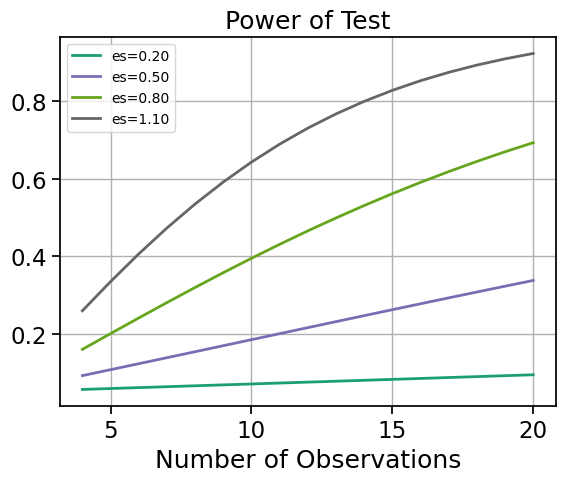

In [41]:
#lastly power curve

effect_sizes = np.array([0.2, 0.5, 0.8, 1.1])
sample_sizes = np.array(range(4, 21))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

In [42]:
#create Age group at Arrest (<17 vs.  18-24) groups from dataset 
#creating two different datasets one with <17 and 18-24

Aged_17_younger = data2_grouped[data2_grouped['Age_group__at_arrest_']=='Aged 17 and younger']
Aged_18_24 = data2_grouped[data2_grouped['Age_group__at_arrest_']=='Aged 18 to 24 years']

Aged17_Booked = Aged_17_younger['Booked']
Aged18to24_Booked = Aged_18_24['Booked']

#conduct power analysis for Perceived Race
effect_size_age = Cohens_d(Aged17_Booked,Aged18to24_Booked)
alpha = 0.05
power = 0.8
ratio_ =len(Aged17_Booked)/len(Aged18to24_Booked) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Age Group at Arrest Mean Booked Score:',effect_size_age)

Effect size (Cohen's D) for Age Group at Arrest Mean Booked Score: -1.1748957990117235


In [43]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size_age, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for aged 18-24 Mean Booked Score') 
print('Actual size of aged 18-24 Mean Booked Score:', len(Aged18to24_Booked))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for aged <17 Mean Booked Score')
print('Actual size of aged <17 Mean Booked Score:', len(Aged17_Booked))

Sample Size of nobs1: 12.410 needed for aged 18-24 Mean Booked Score
Actual size of aged 18-24 Mean Booked Score: 16
Sample Size of nobs2: 12.410 needed for aged <17 Mean Booked Score
Actual size of aged <17 Mean Booked Score: 16


In [44]:
power = TTestPower()
n_test = power.solve_power(nobs=16, effect_size = 0.75, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 0.801


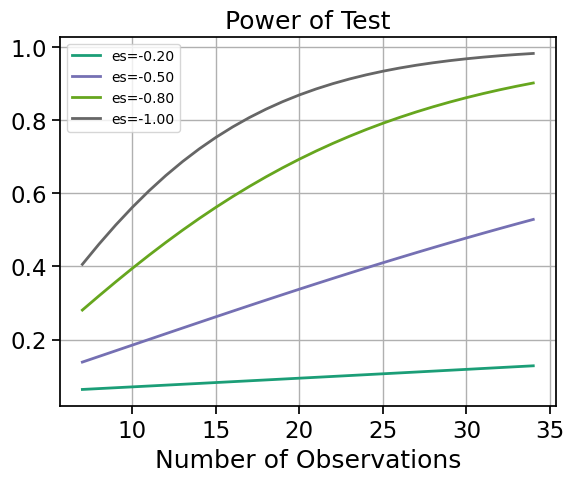

In [45]:
#lastly power curve

effect_sizes = np.array([-0.2, -0.5, -0.8, -1])
sample_sizes = np.array(range(7, 35))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

In [46]:
#create Perceived Race (MiddleEastern vs. Indigenous) groups from dataset 
#creating two different datasets one with MiddleEastern and Indigenous

ME = data2_grouped[data2_grouped['Perceived_Race']=='Middle-Eastern']
Ind = data2_grouped[data2_grouped['Perceived_Race']=='Indigenous']

ME_StripSearch = ME['StripSearch']
Ind_StripSearch = Ind['StripSearch']

#conduct power analysis for Perceived Race
effect_size_race2 = Cohens_d(ME_StripSearch,Ind_StripSearch)
alpha = 0.05
power = 0.8
ratio_ =len(ME_StripSearch)/len(Ind_StripSearch) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Perceived Race (Middle-Eastern and Indigenous) Mean StripSearch Score:',
      effect_size_race2)

Effect size (Cohen's D) for Perceived Race (Middle-Eastern and Indigenous) Mean StripSearch Score: -1.2386200791025113


In [47]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size_race2, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for Indigenous Mean StripSearch Score') 
print('Actual size of Indigenous Mean StripSearch Score:', len(Ind_StripSearch))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for Middle-Eastern Mean StripSearch Score')
print('Actual size of Middle-Eastern Mean StripSearch Score:', len(ME_StripSearch))

Sample Size of nobs1: 11.278 needed for Indigenous Mean StripSearch Score
Actual size of Indigenous Mean StripSearch Score: 14
Sample Size of nobs2: 11.278 needed for Middle-Eastern Mean StripSearch Score
Actual size of Middle-Eastern Mean StripSearch Score: 14


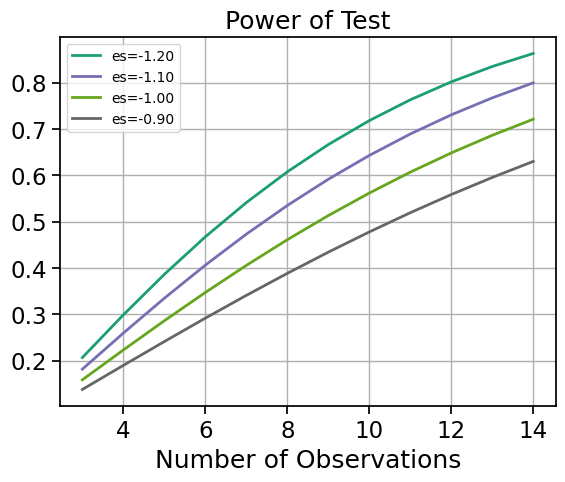

In [48]:
#lastly power curve

effect_sizes = np.array([-1.2, -1.1, -1, -0.9])
sample_sizes = np.array(range(3, 15))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# if the desired level of power is 0.80, and the effect size is -1.1,
# the power graph can be used to determine the corresponding sample size needed to achieve that level of power,
# in this case, approximately a sample size of 14 is required for Perceived Race.


In [49]:
#create Perceived Race (Indigenous vs. Latino) groups from dataset 
#creating two different datasets one with Indigenous and Latino

La = data2_grouped[data2_grouped['Perceived_Race']=='Latino']
Ind = data2_grouped[data2_grouped['Perceived_Race']=='Indigenous']

La_StripSearch = La['StripSearch']
Ind_StripSearch = Ind['StripSearch']

#conduct power analysis for Perceived Race
effect_size_race3 = Cohens_d(La_StripSearch,Ind_StripSearch)
alpha = 0.05
power = 0.8
ratio_ =len(Ind_StripSearch)/len(La_StripSearch) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Perceived Race (Indigenous and Latino) Mean StripSearch Score:',
      effect_size_race3)

Effect size (Cohen's D) for Perceived Race (Indigenous and Latino) Mean StripSearch Score: -0.8446997877071892


In [50]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size_race3, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for Latino Mean StripSearch Score') 
print('Actual size of Latino Mean StripSearch Score:', len(La_StripSearch))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for Indigenous Mean StripSearch Score')
print('Actual size of Indigenous Mean StripSearch Score:', len(La_StripSearch))

Sample Size of nobs1: 23.001 needed for Latino Mean StripSearch Score
Actual size of Latino Mean StripSearch Score: 14
Sample Size of nobs2: 23.001 needed for Indigenous Mean StripSearch Score
Actual size of Indigenous Mean StripSearch Score: 14


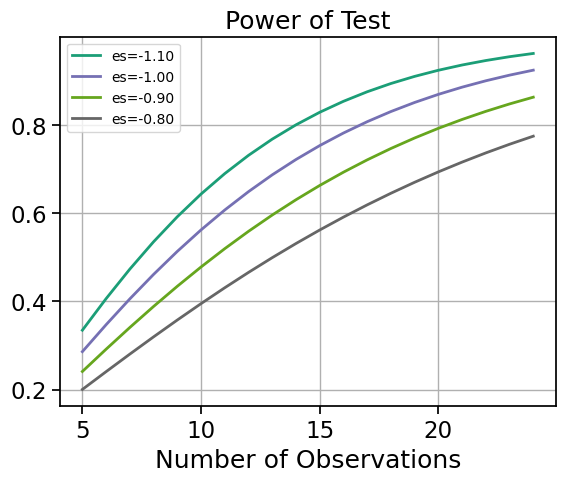

In [51]:
#lastly power curve

effect_sizes = np.array([-1.1, -1, -0.9, -0.8])
sample_sizes = np.array(range(5, 25))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
plt.legend(fontsize=10)  
plt.grid(True)
plt.show()

# if the desired level of power is 0.80, and the effect size is -1.1,
# the power graph can be used to determine the corresponding sample size needed to achieve that level of power,
# in this case, approximately a sample size of 14 is required for Perceived Race.


In [52]:
############# Check ANCOVA assumptions: Independence, Normality, Equal Variance

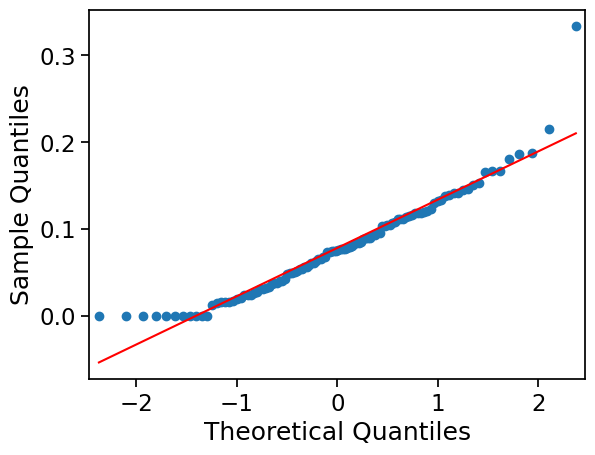

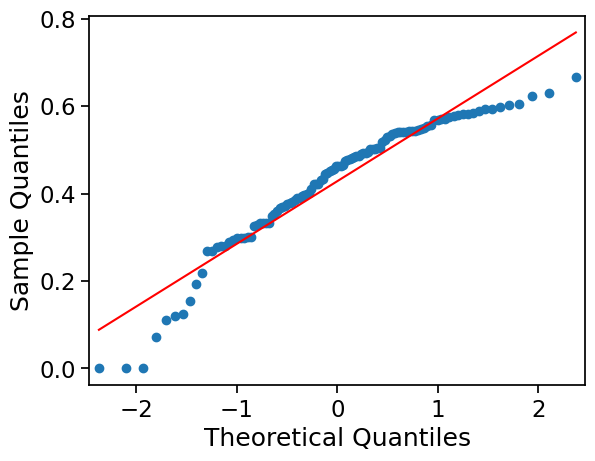

In [53]:
# q-q plot

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(data2_grouped['StripSearch'], line='s')
pyplot.show()

qqplot(data2_grouped['Booked'], line='s')
pyplot.show()

In [54]:
stats.levene(data2_grouped['StripSearch'][data2_grouped['Sex'] == 'F'],
             data2_grouped['StripSearch'][data2_grouped['Sex'] == 'M'])

LeveneResult(statistic=0.17428377143524365, pvalue=0.6771461196232877)

In [55]:
stats.levene(data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'Black'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'Latino'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'Indigenous'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'Middle-Eastern'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'Unknown or Legacy'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'East/Southeast Asian'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'South Asian'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'White'])

LeveneResult(statistic=1.7367781021623563, pvalue=0.10839180778893559)

In [56]:
stats.levene(data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 17 and younger'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 18 to 24 years'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 25 to 34 years'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 35 to 44 years'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 45 to 54 years'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 55 to 64 years'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 65 and older'])

LeveneResult(statistic=0.8975360247027538, pvalue=0.49968730830203956)

In [57]:
# Independence : an individual can only belong in one group.
# Also, this means that the data is not repeated measures (not collected through time)

In [58]:
############### ANCOVA

In [59]:
#Black vs. East/Southeast Asian (Booked)
selected_race_booked = data_clean_grouped[(data_clean_grouped['Perceived_Race'] == 2)|
                              (data_clean_grouped['Perceived_Race'] == 4)]

# Perform the ANCOVA
model_1 = ols('Booked ~ Perceived_Race + Sex + Age_group__at_arrest_', data = selected_race_booked).fit()

# Print the summary of the model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Booked   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     23.14
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.91e-07
Time:                        13:25:54   Log-Likelihood:                 39.838
No. Observations:                  28   AIC:                            -71.68
Df Residuals:                      24   BIC:                            -66.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.87

In [60]:
!pip install pingouin
from pingouin import ancova
ancova(data = selected_race_booked, dv = 'Booked', covar = ['Sex', 'Age_group__at_arrest_'],
       between = 'Perceived_Race')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 8.4 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=fc8299cb6435569a2333c7f3b30576a21ef75fde68fb090910f7316e73501e5b
  Stored in directory: /home/jovyan/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,0.076927,1,19.382671,1.897638e-04,0.446784
1,Sex,0.187831,1,47.326236,4.090795e-07,0.663518
2,Age_group__at_arrest_,0.010771,1,2.713780,1.125175e-01,0.101587
3,Residual,0.095252,24,NaN,NaN,NaN


In [61]:
#Age(<17) vs. Age(18-24) (Booked)
selected_age_booked = data_clean_grouped[(data_clean_grouped['Age_group__at_arrest_'] == 1)|
                              (data_clean_grouped['Age_group__at_arrest_'] == 2)]

# Perform the ANCOVA
model_2 = ols('Booked ~ Age_group__at_arrest_ + Sex + Perceived_Race', data = selected_age_booked).fit()

# Print the summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Booked   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     12.16
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.83e-05
Time:                        13:26:02   Log-Likelihood:                 29.455
No. Observations:                  32   AIC:                            -50.91
Df Residuals:                      28   BIC:                            -45.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.42

In [62]:
ancova(data = selected_age_booked, dv = 'Booked', covar = ['Sex', 'Perceived_Race'],
       between = 'Age_group__at_arrest_')

,Source,SS,DF,F,p-unc,np2
0,Age_group__at_arrest_,0.184222,1,17.350856,0.000269,0.382592
1,Sex,0.202601,1,19.081932,0.000155,0.405292
2,Perceived_Race,0.000575,1,0.054150,0.817685,0.001930
3,Residual,0.297288,28,NaN,NaN,NaN


In [63]:
#Middle-Eastern vs. Indigenous (StripSearch)
selected_race_StripSearch = data_clean_grouped[(data_clean_grouped['Perceived_Race'] == 6)|
                              (data_clean_grouped['Perceived_Race'] == 7)]

# Perform the ANCOVA
model_3 = ols('StripSearch ~ Perceived_Race + Sex + Age_group__at_arrest_', data = selected_race_StripSearch).fit()

# Print the summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     17.68
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.84e-06
Time:                        13:26:02   Log-Likelihood:                 49.330
No. Observations:                  28   AIC:                            -90.66
Df Residuals:                      24   BIC:                            -85.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.28

In [64]:
ancova(data = selected_race_StripSearch, dv = 'StripSearch', covar = ['Sex', 'Age_group__at_arrest_'],
       between = 'Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,0.045375,1,22.522175,0.000079,0.484117
1,Sex,0.015927,1,7.905474,0.009664,0.247778
2,Age_group__at_arrest_,0.045574,1,22.621249,0.000077,0.485213
3,Residual,0.048352,24,NaN,NaN,NaN


In [65]:
#Indigenous vs. Latino (StripSearch)
selected_Race_StripSearch = data_clean_grouped[(data_clean_grouped['Perceived_Race'] == 7)|
                              (data_clean_grouped['Perceived_Race'] == 8)]

# Perform the ANCOVA
model_4 = ols('StripSearch ~ Perceived_Race + Sex + Age_group__at_arrest_', data = selected_Race_StripSearch).fit()

# Print the summary of the model
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     6.347
Date:                Sun, 16 Apr 2023   Prob (F-statistic):            0.00253
Time:                        13:26:03   Log-Likelihood:                 40.846
No. Observations:                  28   AIC:                            -73.69
Df Residuals:                      24   BIC:                            -68.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.69

In [66]:
ancova(data = selected_Race_StripSearch, dv = 'StripSearch', covar = ['Sex', 'Age_group__at_arrest_'],
       between = 'Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,0.025614,1,6.935874,0.014553,0.224202
1,Sex,0.020240,1,5.480625,0.027866,0.185906
2,Age_group__at_arrest_,0.024465,1,6.624739,0.016659,0.216320
3,Residual,0.088632,24,NaN,NaN,NaN


In [67]:
# Train and Test Sets

In [68]:
from sklearn.model_selection import train_test_split

# Select the first column of our DataFrame that we will use as the predictors in our models
x = num_data.iloc[:,:3]

# Select the response column 
y = num_data.StripSearch

# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123)

In [69]:
#building the model with statsmodels

import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(num_data.columns[:3])
formula = "StripSearch ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
## Formula:  StripSearch ~ Sex + Perceived Race + Age Group at Arrest

trainingdata = pd.concat([x_train,y_train], axis = 1)


Formula:  StripSearch ~ Perceived_Race + Sex + Age_group__at_arrest_ 



In [70]:
# Logistic Regression
mod = sm.Logit.from_formula('StripSearch ~ Perceived_Race + Sex + Age_group__at_arrest_', trainingdata)
res = mod.fit()
me = res.get_margeff()

Optimization terminated successfully.
         Current function value: 0.366931
         Iterations 6


In [71]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                48929
Model:                          Logit   Df Residuals:                    48925
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                0.007615
Time:                        13:26:03   Log-Likelihood:                -17954.
converged:                       True   LL-Null:                       -18091.
Covariance Type:            nonrobust   LLR p-value:                 1.963e-59
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.0720      0.064    -16.726      0.000      -1.198      -0.946
Perceived_Race           -0.0981      0.008    -11.998      0.000      -0.114      -0.082
Sex                      -0.2574      0.037     -6.923      0.000      -0.330      -0.185
Age_group__at_arrest_    -0.1061      0.011     -9.974      0.000      -0.127      -0.085
=========================================================================================
"""

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict responses 
pred_1 = res.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.886020846106683


In [73]:
from scipy import stats

Λ = lambda x: stats.logistic().cdf(x)
λ = lambda x: stats.logistic().pdf(x)

β_ = res.params.values.reshape(-1, 1)
V_ = res.cov_params().values

In [74]:
# Confusion matrix
## 
## Test accuracy =  0.886020846106683

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[14451     0]
 [ 1859     0]]


In [75]:
#odds ratio

params = res.params
conf = res.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.301900,0.388128,0.342309
Perceived_Race,0.892161,0.921214,0.906571
Sex,0.718696,0.831477,0.773033
Age_group__at_arrest_,0.880730,0.918248,0.899293


In [76]:
# for multiple observations, but not quite vectorized fully

def var_πs(xx, β, V_):
    α = λ(xx.dot(β))**2
    out = np.empty((1000, 1))
    for i, x in enumerate(xx):
        out[i] = x.T.dot(V_).dot(x)
    return α * out

In [77]:
# 
race = np.linspace(x.Perceived_Race.min(), x.Perceived_Race.max(), 1000)
xx = np.stack((np.full(1000,1), # constant
              race,
              np.full(1000,1),  # male
              np.full(1000,1))) # 17 and younger
xx = np.transpose(xx)

In [78]:
πs = Λ(np.dot(xx, β_))
vv = np.sqrt(var_πs(xx, β_, V_))

In [79]:
from scipy.stats import t
df = xx.shape[0] - xx.shape[1] - 1
t_crit = t.ppf(0.975, df)
t_crit

1.962351030264214

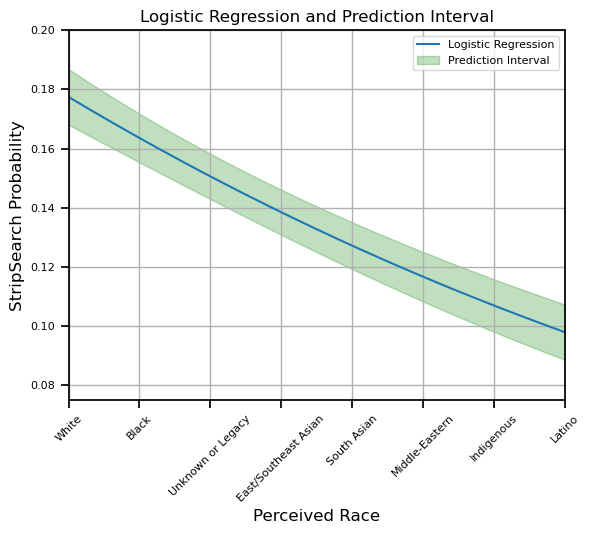

In [80]:
plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - t_crit*vv).ravel(), (πs + t_crit*vv).ravel(),
                 alpha=.25, color='g')
plt.xlabel('Perceived Race', fontsize=12)
plt.ylabel('StripSearch Probability', fontsize=12)
plt.axis([1, 8, 0.075, 0.2])
x=[1,2,3,4,5,6,7,8,]
labels = ['White', 'Black','Unknown or Legacy', 'East/Southeast Asian', 'South Asian','Middle-Eastern',
                    'Indigenous', 'Latino']
plt.xticks(x, labels, rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Logistic Regression and Prediction Interval",
          fontsize = 12)
plt.grid(True)
plt.legend(['Logistic Regression','Prediction Interval'], fontsize=8)
plt.show()

In [81]:
################## Reach the End